In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import mplsoccer.pitch as Pitch
import seaborn as sns

In [4]:
#Want to add dataframe
df=pd.read_csv('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Messi vs Spurs at Wembley 2018:19/Messi without  events with end coordinates/Messi vs Spurs without end coordinates.csv')

In [5]:
df

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,Barcelona,Messi,Dribble,0,55,54,37,49,46
1,Barcelona,Messi,Successful Pass,0,56,48,49,13,73
2,Barcelona,Messi,Successful Pass,1,22,53,23,59,19
3,Barcelona,Messi,Dribble,1,24,46,81,35,65
4,Barcelona,Messi,Successful Pass,1,40,52,43,54,53
...,...,...,...,...,...,...,...,...,...
66,Barcelona,Messi,Successful Pass,10,40,72,94,78,95
67,Barcelona,Messi,Successful Pass,10,44,39,23,39,33
68,Barcelona,Messi,Unsuccessful Pass,10,47,45,55,53,60
69,Barcelona,Messi,Dribble,10,53,63,96,75,95


In [6]:
import numpy as np

In [7]:
#Want to list number of events Messi has in the dataset. Helps with legend.
event_counts=df['Event'].value_counts()
print(event_counts)

Successful Pass      40
Dribble              16
Unsuccessful Pass     8
Shot on Target        2
Shot off Target       2
Goal                  2
Free kick             1
Name: Event, dtype: int64


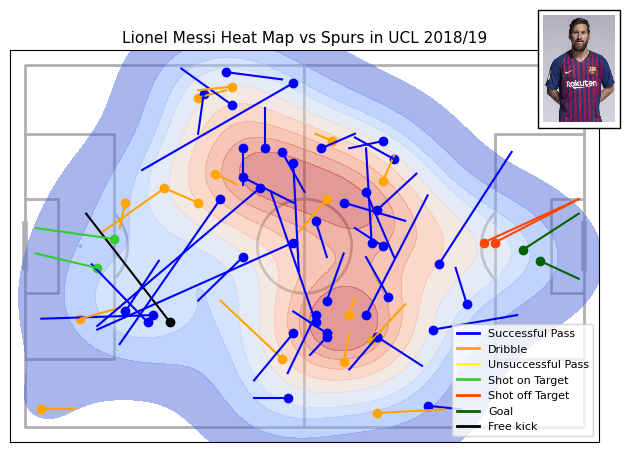

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

# Create the pitch
pitch = Pitch(pitch_type='wyscout', axis=True, label=True)
fig, ax = pitch.draw()

# Creating the heatmap using kdeplot
sns.kdeplot(
    x=df['X'],  # Use x= for X coordinates
    y=df['Y'],  # Use y= for Y coordinates
    fill=True,  # Fill the contours for better visualization
    cmap='coolwarm',  # Choose a colormap for the heatmap
    ax=ax,  # Use the same pitch axis
    alpha=0.5  # Transparency
)

# Loop through the dataset and plot events with specific colors
for X in range(len(df['X'])):
    if df['Event'][X] == 'Successful Pass':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='blue')
        plt.scatter(df['X'][X], df['Y'][X], color='blue')
    if df['Event'][X] == 'Dribble':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='orange')
        plt.scatter(df['X'][X], df['Y'][X], color='orange')
    if df['Event'][X] == 'Unsuccessful Pass':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='yellow')
        plt.scatter(df['X'][X], df['Y'][X], color='yellow')
    if df['Event'][X] == 'Shot on Target':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='limegreen')
        plt.scatter(df['X'][X], df['Y'][X], color='limegreen')
    if df['Event'][X] == 'Shot off Target':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='orangered')
        plt.scatter(df['X'][X], df['Y'][X], color='orangered')
    if df['Event'][X] == 'Goal':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='darkgreen')
        plt.scatter(df['X'][X], df['Y'][X], color='darkgreen')
    if df['Event'][X] == 'Free kick':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='black')
        plt.scatter(df['X'][X], df['Y'][X], color='black')

#legend
legend_elements = [
    Line2D([0], [0], color='blue', lw=2, label='Successful Pass'),
    Line2D([0], [0], color='orange', lw=2, label='Dribble'),
    Line2D([0], [0], color='yellow', lw=2, label='Unsuccessful Pass'),
    Line2D([0], [0], color='limegreen', lw=2, label='Shot on Target'),
    Line2D([0], [0], color='orangered', lw=2, label='Shot off Target'),
    Line2D([0], [0], color='darkgreen', lw=2, label='Goal'),
    Line2D([0], [0], color='black', lw=2, label='Free kick'),

]
ax.legend(handles=legend_elements, loc='lower right', fontsize=8)

# Player image (replace with valid path)
player_image = Image.open('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Messi vs Spurs at Wembley 2018:19/Lionel Messi portrait.jpg'
)
imagebox = OffsetImage(player_image, zoom=0.19)
ab = AnnotationBbox(imagebox, (99, 1), frameon=True, xycoords='data')
ax.add_artist(ab)

# Remove the x and y axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")

# Add a title to the heatmap, you cannot have "/" when naming files
plt.title('Lionel Messi Heat Map vs Spurs in UCL 2018/19', color='black', size=11)
plt.savefig('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Lionel Messi Heat Map vs Tottenham in UCL 2018:19.png',dpi=300, bbox_inches='tight')
plt.show()